Back to the main [Index](../index.ipynb)

### Simple Example

In [9]:
from notebooktools import *
dir(notebooktools.sys)

['__displayhook__',
 '__doc__',
 '__egginsert',
 '__excepthook__',
 '__name__',
 '__package__',
 '__plen',
 '__stderr__',
 '__stdin__',
 '__stdout__',
 '_clear_type_cache',
 '_current_frames',
 '_getframe',
 '_mercurial',
 'api_version',
 'argv',
 'builtin_module_names',
 'byteorder',
 'call_tracing',
 'callstats',
 'copyright',
 'displayhook',
 'dont_write_bytecode',
 'exc_clear',
 'exc_info',
 'exc_type',
 'excepthook',
 'exec_prefix',
 'executable',
 'exit',
 'exitfunc',
 'flags',
 'float_info',
 'float_repr_style',
 'getcheckinterval',
 'getdefaultencoding',
 'getdlopenflags',
 'getfilesystemencoding',
 'getprofile',
 'getrecursionlimit',
 'getrefcount',
 'getsizeof',
 'gettrace',
 'hexversion',
 'long_info',
 'maxint',
 'maxsize',
 'maxunicode',
 'meta_path',
 'modules',
 'path',
 'path_hooks',
 'path_importer_cache',
 'platform',
 'prefix',
 'ps1',
 'ps2',
 'ps3',
 'py3kwarning',
 'setcheckinterval',
 'setdlopenflags',
 'setprofile',
 'setrecursionlimit',
 'settrace',
 'stderr',


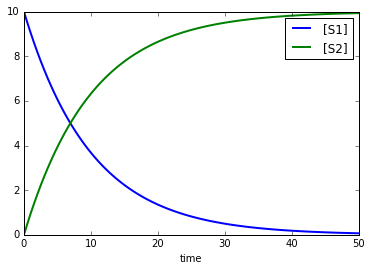

In [10]:
%matplotlib inline
from __future__ import print_function
import tellurium as te
r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 10')
r.simulate(0, 50, 100)
r.plot();

### More Complex Example
Stochastic simulation of a linear chain.

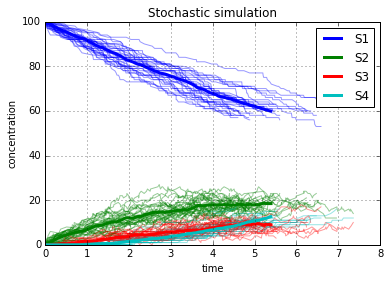

In [13]:
import tellurium as te
import numpy as np

r = te.loada('''
    J1: S1 -> S2;  k1*S1; 
    #J2: S2 -> S3; k2*S2 - k3*S3
     J2_1: S2 -> S3; k2*S2
     J2_2: S3 -> S2; k3*S3;
    J3: S3 -> S4; k4*S3;

    k1 = 0.1; k2 = 0.5; k3 = 0.5; k4 = 0.5;
    S1 = 100;
''')

# set integrator, seed and selections for output
r.setIntegrator('gillespie')
r.setSeed(1234)
r.selections = ['time'] + r.getBoundarySpeciesIds() + r.getFloatingSpeciesIds()

# run repeated simulation
Ncol = len(r.selections)
Nsim = 30
points = 101
s_sum = np.zeros(shape=[points, Ncol])
for k in range(Nsim):
    r.resetToOrigin()
    s = r.simulate(0, 50, points)
    s_sum += s
    # no legend, do not show
    r.plot(s, show=False, loc=None, alpha=0.4, linewidth=1.0)
    
# add mean curve, legend, show everything and set labels, titels, ...
s_mean = s_sum/Nsim
r.plot( s_mean, loc='upper right', show=True, linewidth=3.0,
       title="Stochastic simulation", xlabel="time", ylabel="concentration", grid=True);